In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset
csv_file_path = 'wavelet_metrics.csv'  # Path to your CSV file
data = pd.read_csv(csv_file_path)

# Step 2: Separate features and labels
X = data.drop(['Data', 'label'], axis=1)  # Drop non-numeric and target columns
y = data['label']  # Extract labels (0 or 1)

# Step 3: Ensure equal class distribution in train and test sets
class_0 = data[data['label'] == 0]
class_1 = data[data['label'] == 1]

# Step 4: Split each class into 80% train and 20% test
train_0, test_0 = train_test_split(class_0, test_size=0.5, random_state=0)
train_1, test_1 = train_test_split(class_1, test_size=0.5, random_state=0)

# Step 5: Concatenate the training and testing data for both classes
train_data = pd.concat([train_0, train_1])
test_data = pd.concat([test_0, test_1])

# Suffle the data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Step 6: Extract features and labels from the training and testing sets
X_train = train_data.drop(['Data', 'label'], axis=1)
y_train = train_data['label']
X_test = test_data.drop(['Data', 'label'], axis=1)
y_test = test_data['label']

# Step 7: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Apply LDA for dimensionality reduction
lda = LDA(n_components=1)  # Binary classification, so 1 component is sufficient
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 9: Train an SVM classifier on the LDA-transformed data
svm = SVC( C = 1, kernel='rbf', random_state=0, gamma=0.02)  
svm.fit(X_train_lda, y_train)

# Step 10: Predict and evaluate the SVM classifier
y_pred = svm.predict(X_test_lda)

# Step 12: Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Step 13: Calculate Sensitivity and Specificity
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Step 14: Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nSensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[400   0]
 [  1 399]]

Sensitivity: 1.00
Specificity: 1.00
Accuracy: 1.00


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer

# Step 1: Load the dataset
csv_file_path = 'wavelet_metrics.csv'  # Path to your CSV file
data = pd.read_csv(csv_file_path)

# Step 2: Separate features and labels
X = data.drop(['Data', 'label'], axis=1)  # Drop non-numeric and target columns
y = data['label']  # Extract labels (0 or 1)

# Step 3: Ensure equal class distribution in train and test sets
class_0 = data[data['label'] == 0]
class_1 = data[data['label'] == 1]

# Step 4: Split each class into 80% train and 20% test
train_0, test_0 = train_test_split(class_0, test_size=0.5, random_state=0)
train_1, test_1 = train_test_split(class_1, test_size=0.5, random_state=0)

# Step 5: Concatenate the training and testing data for both classes
train_data = pd.concat([train_0, train_1])
test_data = pd.concat([test_0, test_1])

# Suffling the data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Step 6: Extract features and labels from the training and testing sets
X_train = train_data.drop(['Data', 'label'], axis=1)
y_train = train_data['label']
X_test = test_data.drop(['Data', 'label'], axis=1)
y_test = test_data['label']

# Step 7: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 8: Apply LDA for dimensionality reduction
lda = LDA(n_components=1)  # Binary classification, so 1 component is sufficient
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 2, 3, 5, 10, 11, 20, 30, 40, 50, 100, 200],      # Regularization parameter
    'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1],  # RBF Kernel coefficient
}

# Use StratifiedKFold for balanced cross-validation splits
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Define the SVM with RBF kernel
svm = SVC(kernel='rbf', random_state=0)

# Perform GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_lda, y_train)

# Print the best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Step 10: Train the final SVM model with the best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_lda, y_train)

# Step 11: Predict on the test set
y_pred = best_svm.predict(X_test_lda)

# Step 12: Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Step 13: Calculate Sensitivity and Specificity
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Step 14: Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nSensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best Parameters: {'C': 0.01, 'gamma': 0.5}
Confusion Matrix:
[[400   0]
 [  1 399]]

Sensitivity: 1.00
Specificity: 1.00
Accuracy: 1.00


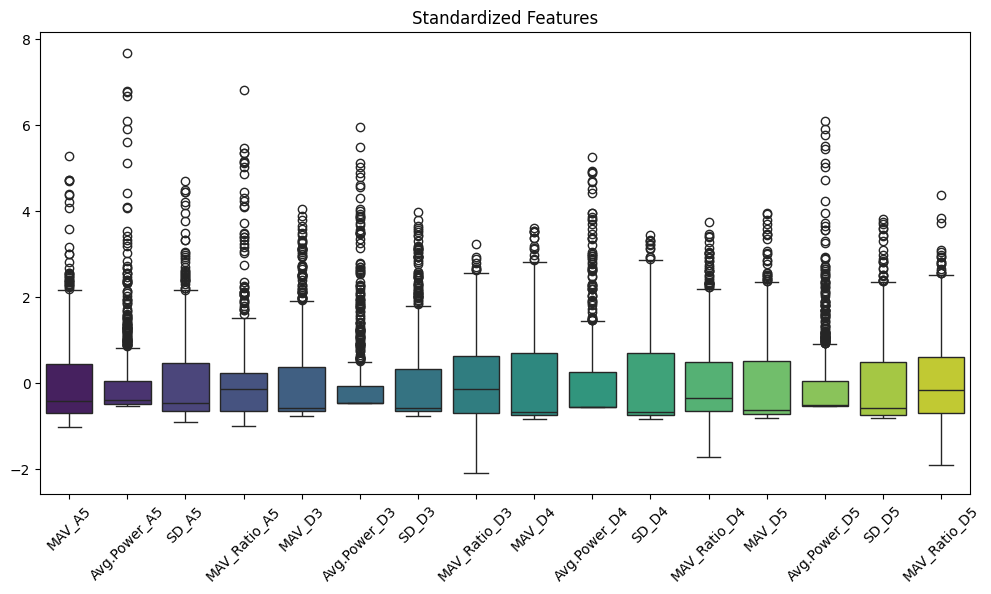

In [5]:
# Vizualizing the standarized features in step 7
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the standardized features
X_train_df = pd.DataFrame(X_train, columns=data.columns[1:-1])

# Plot the standardized features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Standardized Features')
plt.show()


c:\Python311\cv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


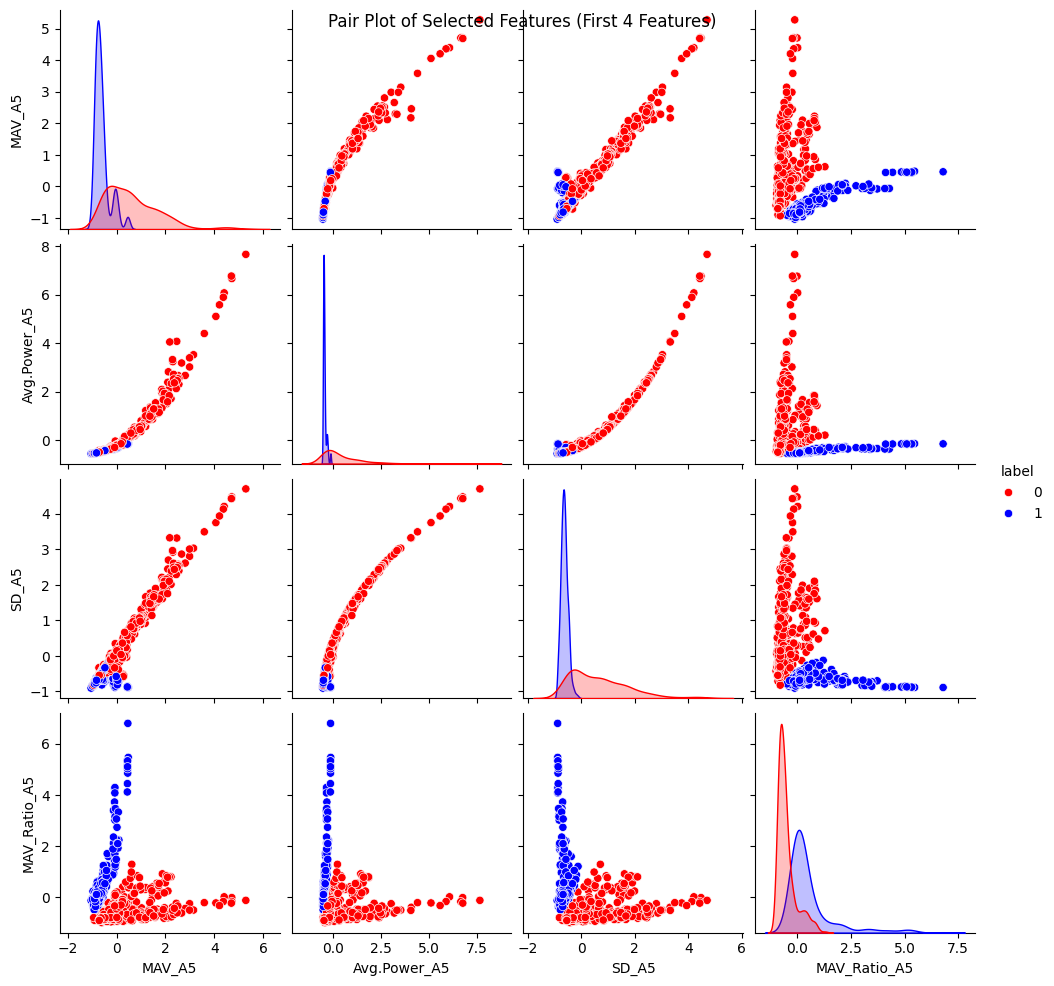

In [ ]:
import seaborn as sns

# Step 8: Add the labels back to the standardized training set for plotting
train_data_std = pd.DataFrame(X_train, columns=data.columns[1:-1])  # Column names for standardized data
train_data_std['label'] = y_train.values  # Add label back to standardized data

# Step 9: Plot pair plots
sns.pairplot(train_data_std, vars=train_data_std.columns[:4], hue='label', palette={0: 'red', 1: 'blue'})
plt.suptitle('Pair Plot of Selected Features (First 4 Features)')
plt.show()


c:\Python311\cv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


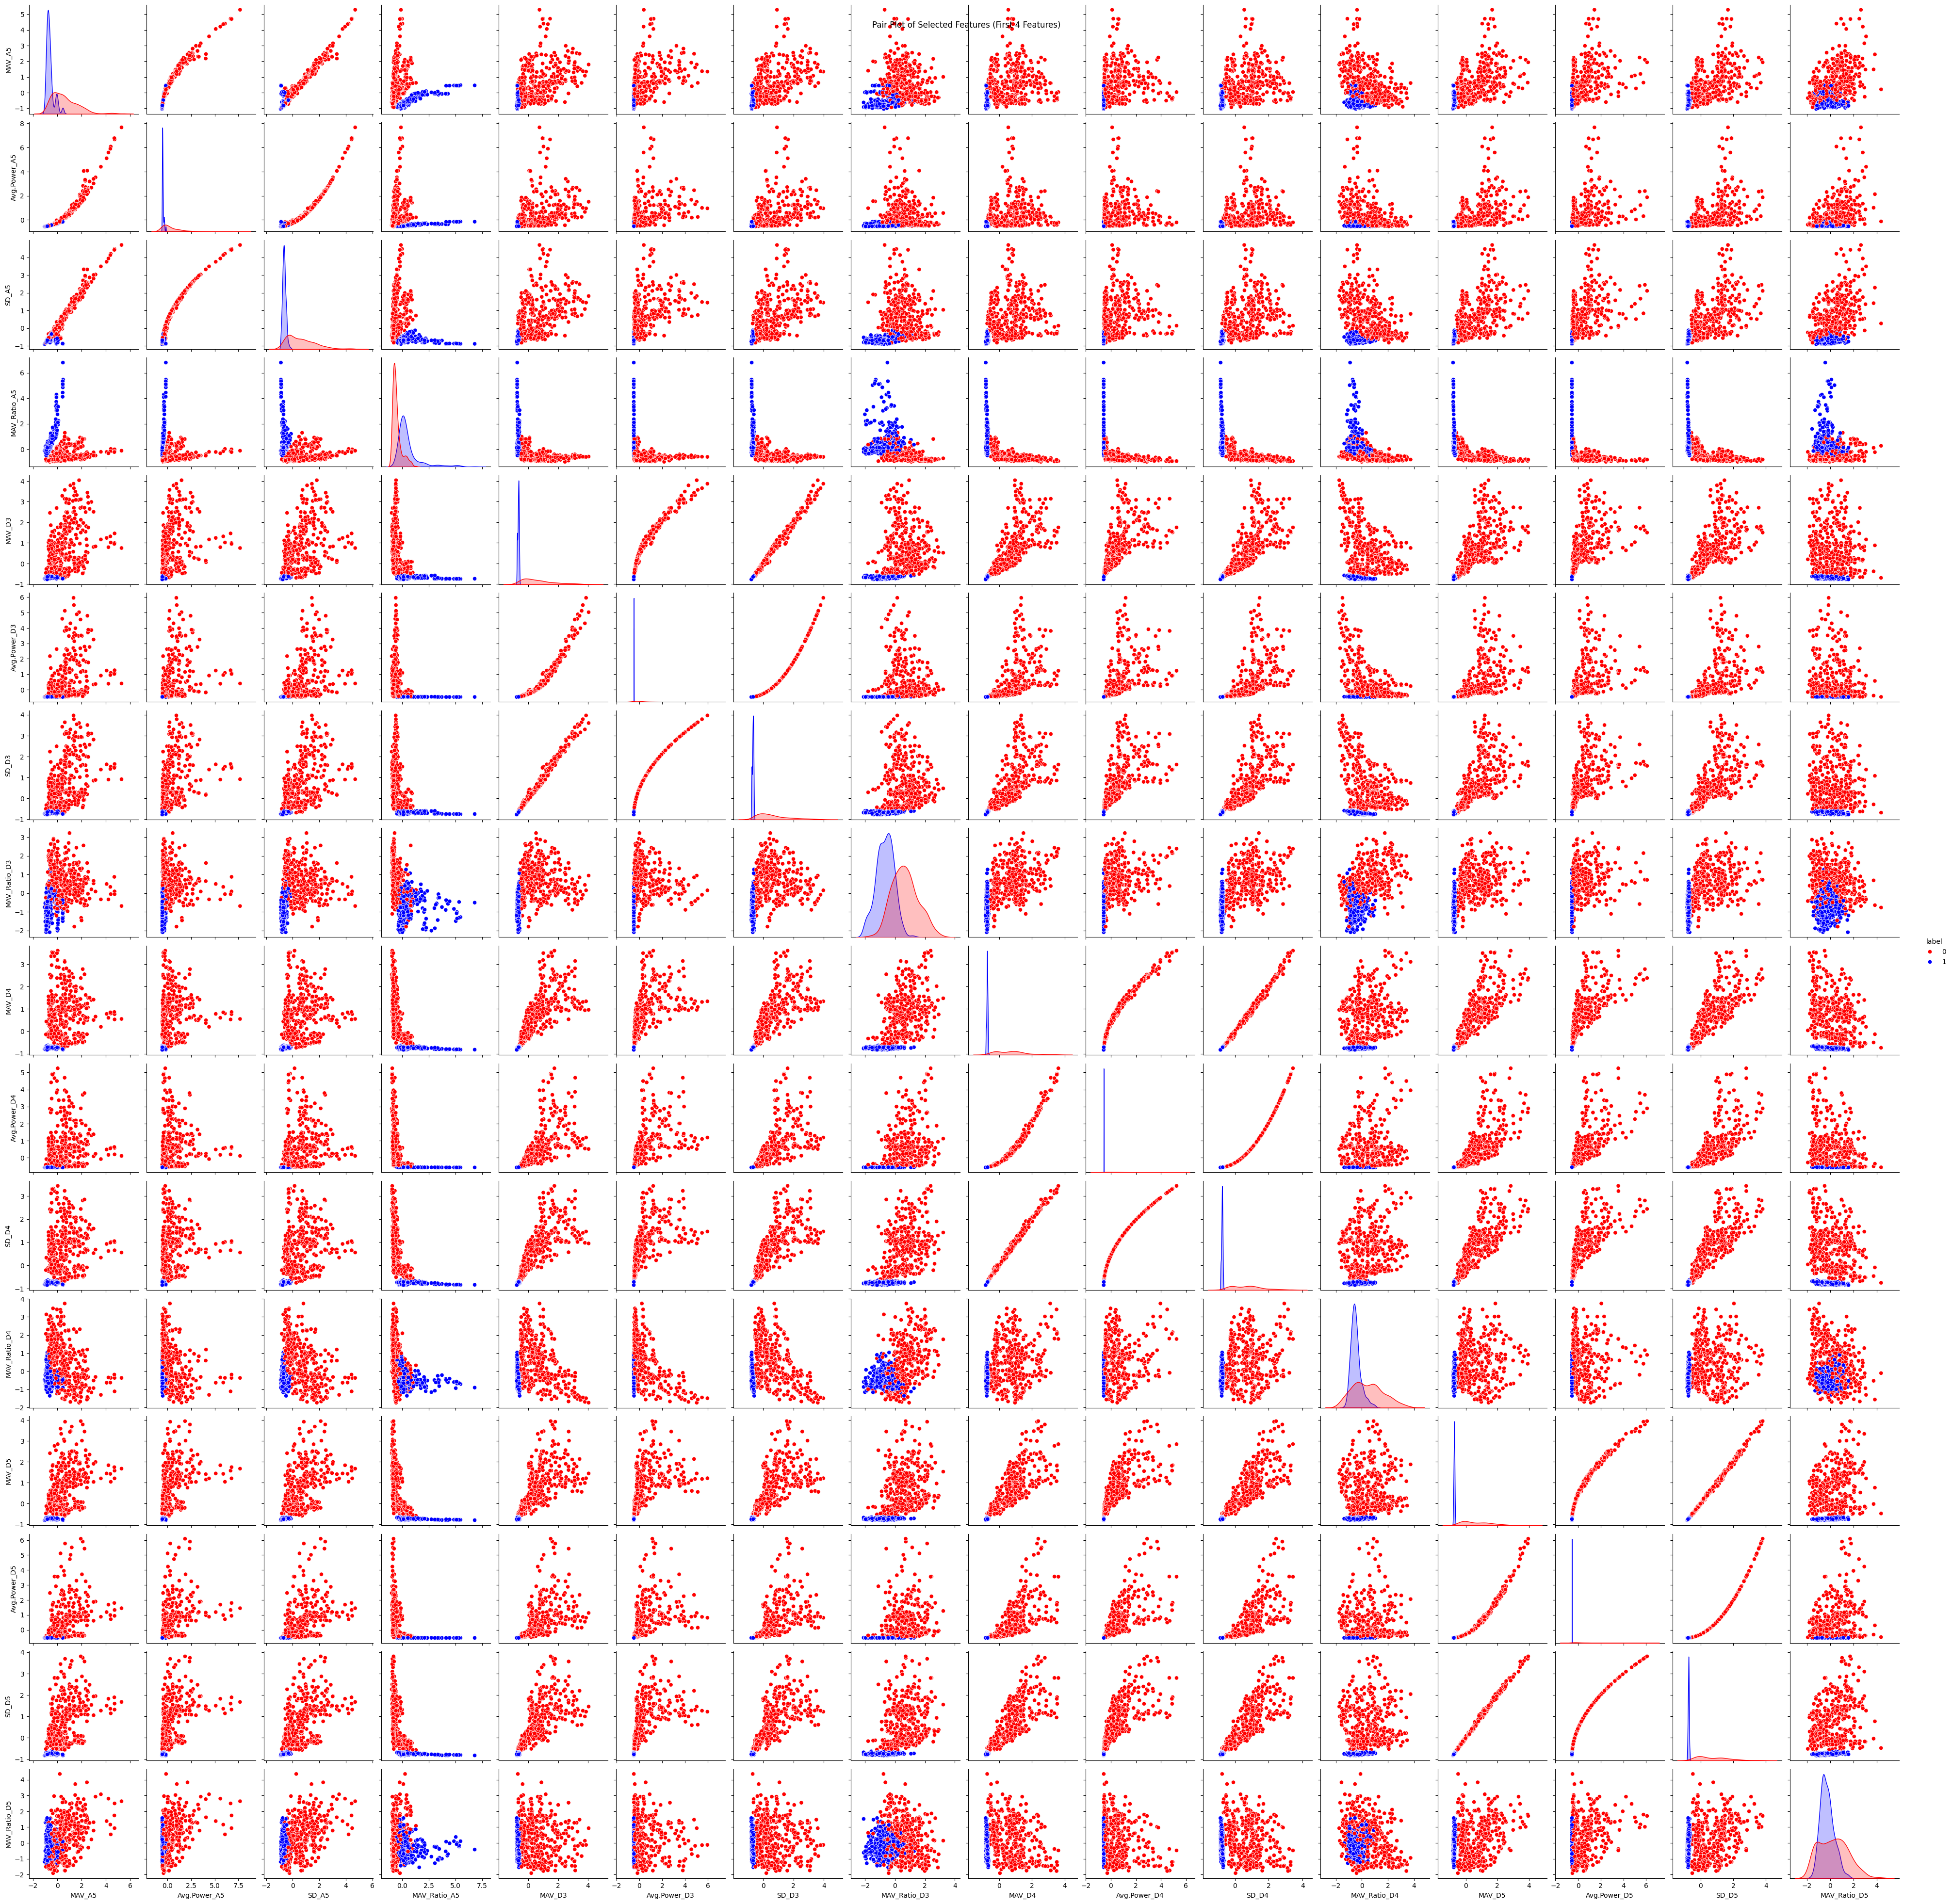

In [8]:
import seaborn as sns

# Step 8: Add the labels back to the standardized training set for plotting
train_data_std = pd.DataFrame(X_train, columns=data.columns[1:-1])  # Column names for standardized data
train_data_std['label'] = y_train.values  # Add label back to standardized data

# Step 9: Plot pair plots
sns.pairplot(train_data_std, vars=train_data_std.columns[:16], hue='label', palette={0: 'red', 1: 'blue'})
plt.suptitle('Pair Plot of Selected Features (First 4 Features)')
plt.show()

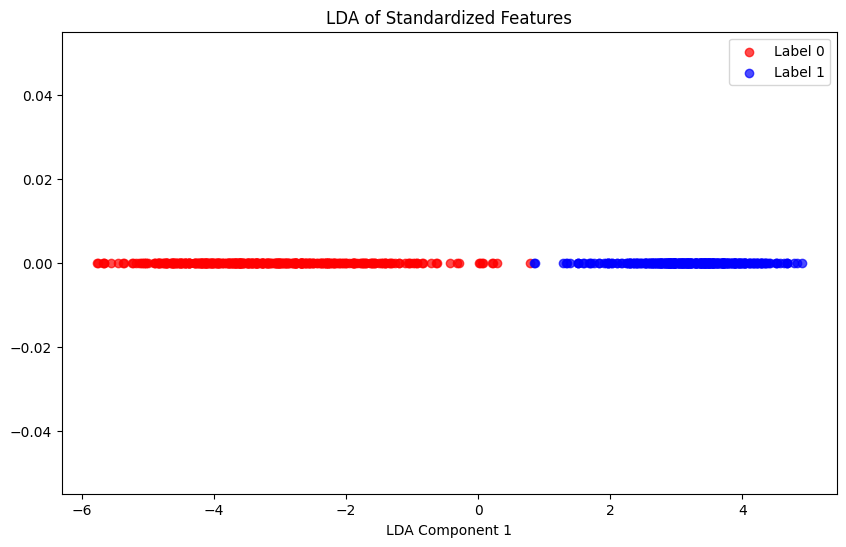

In [9]:
# Step 9: Visualize the LDA result
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda[y_train == 0], np.zeros((X_train_lda[y_train == 0].shape[0])), 
            color='red', label='Label 0', alpha=0.7)
plt.scatter(X_train_lda[y_train == 1], np.zeros((X_train_lda[y_train == 1].shape[0])), 
            color='blue', label='Label 1', alpha=0.7)
plt.xlabel('LDA Component 1')
plt.title('LDA of Standardized Features')
plt.legend()
plt.show()

In [10]:
# After fitting LDA to the training data
lda = LDA(n_components=1)  # Binary classification, so 1 component is sufficient
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Print LDA weights (coefficients)
print("LDA Weights (Coefficients):")
print(lda.coef_)


LDA Weights (Coefficients):
[[-12.51334257  11.21624867  -3.33844088   1.90987188  -8.42132351
   22.04484537 -31.01863811  -1.56532456   8.72281809  11.36056979
  -22.73019086  -9.81854447   8.77004376  -4.81462343  11.48314362
   -5.3491914 ]]


c:\Python311\cv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


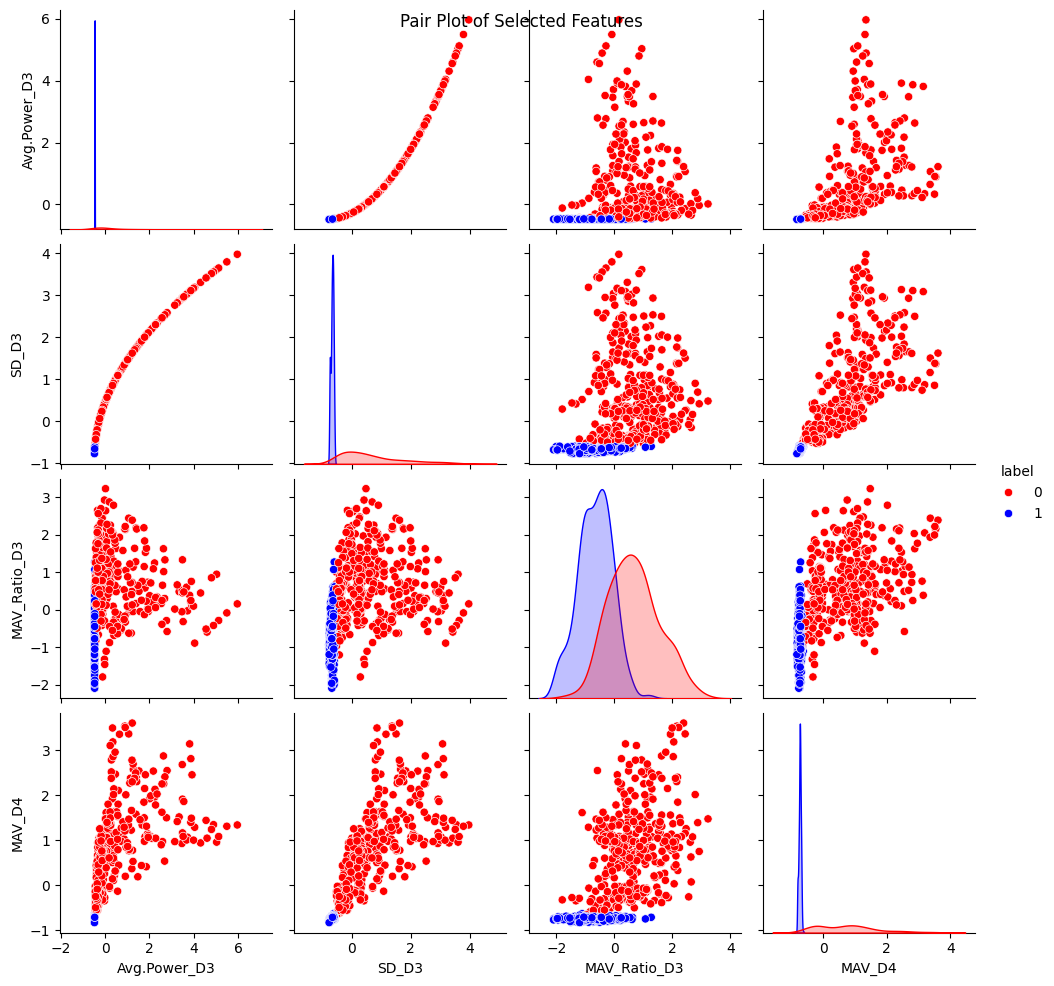

In [14]:
import seaborn as sns

# Step 8: Add the labels back to the standardized training set for plotting
train_data_std = pd.DataFrame(X_train, columns=data.columns[1:-1])  # Column names for standardized data
train_data_std['label'] = y_train.values  # Add label back to standardized data

# Step 9: Plot pair plots
sns.pairplot(train_data_std, vars=train_data_std.columns[5:9], hue='label', palette={0: 'red', 1: 'blue'})
plt.suptitle('Pair Plot of Selected Features')
plt.show()